In [1]:
#Import the required modules
import sklearn
import keras
import pandas as pd 
import numpy as np 
from tqdm import tqdm
import keras.utils as image
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Function 
def arrange_data(df):
    
    image_data = []
    img_paths = np.asarray(df.iloc[:, 0]) #First column is the image paths
    
    for i in tqdm(range(len(img_paths))):
    
        img = image.load_img(img_paths[i],target_size=(200,150,3))
        img = image.img_to_array(img)
        img = img/255
        image_data.append(img)
        
        
    X = np.array(image_data)
    Y = np.array(df.iloc[:,1:29])
    
    return X, Y

In [3]:
# Function to find the accuracy score of the model
def accuracy_score(test_path, model_path):
    
    test_df = pd.read_csv(test_path, delimiter=" ")
    X_test, Y_test = arrange_data (test_df)

    # Loading the model
    model = load_model(model_path)

    # Predicting using Model
    pred = model.predict(np.array(X_test))

    count = 0
    for i in tqdm(range(len(pred))):
        value = 0
        
        first3_index = np.argsort(pred[i])[-3:]
        correct = np.where(Y_test[i] == 1)[0]
        
        for j in first3_index:
            if j in correct:
                value += 1
                
        if (value>0):
            count=count+1
       
    # Print details
    print("Images having atleast one genre correctly identified=",count)
    print("Total number of images =",len(pred))
    print("Accuracy = ", count/len(pred))

In [4]:
# Calling accuracy function for model 1
accuracy_score("Data/Test.csv", "Models/Model_6c.h5")

100%|███████████████████████████████████████████████████████████████████████████████| 206/206 [00:00<00:00, 257.05it/s]


7/7 [==============================] - 2s 180ms/step


100%|█████████████████████████████████████████████████████████████████████████████| 206/206 [00:00<00:00, 25748.03it/s]

Images having atleast one genre correctly identified= 186
Total number of images = 206
Accuracy =  0.9029126213592233


In [5]:
# Calling accuracy function for model 1
accuracy_score("Data/Test.csv", "Models/Model_4d.h5")

100%|███████████████████████████████████████████████████████████████████████████████| 206/206 [00:00<00:00, 288.33it/s]


7/7 [==============================] - 34s 5s/step


100%|█████████████████████████████████████████████████████████████████████████████| 206/206 [00:00<00:00, 18624.88it/s]

Images having atleast one genre correctly identified= 180
Total number of images = 206
Accuracy =  0.8737864077669902


In [6]:
# Function to predict the genre for a particular movie
def find_genre(test_path, model_path):
    model = load_model(model_path) 
    img = image.load_img(test_path,target_size=(200,150,3))
    img = image.img_to_array(img)
    img = img/255
    prob = model.predict(img.reshape(1,200,150,3))

    top_3 = np.argsort(prob[0])[:-4:-1]

    column_lookups = pd.read_csv("Data/Encoded_data_column_lookup.csv", delimiter=" ")
    classes = np.asarray(column_lookups.iloc[1:29, 0])

    for i in range(3):
        print("{}".format(classes[top_3[i]])+" ({:.3})".format(prob[0][top_3[i]]))
    plt.imshow(img)

In [7]:
# loading dataset, and converting the dataframe column to list
df = pd.read_csv("Data/data_with_path.csv")
ids = df.Movie_ID.tolist()

1/1 [==============================] - 1s 537ms/step
Family (0.553)
Crime (0.38)
Adult (0.252)


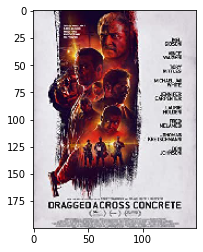

In [8]:
#Calling function for random movie index
index = np.random.randint(low=0, high=len(ids))
path  = "Posters/" + str(ids[index]) + ".jpg"
find_genre(path,"Models/Model_4d.h5")

1/1 [==============================] - 0s 228ms/step
Family (0.556)
Crime (0.368)
Adult (0.226)


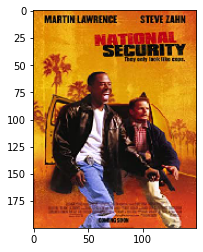

In [9]:
#Calling function for random movie index
index = np.random.randint(low=0, high=len(ids))
path  = "Posters/" + str(ids[index]) + ".jpg"
find_genre(path,"Models/Model_6c.h5")